#### Parte V: Exploración y Visualización de Datos Avanzada

In [1]:
# carga de datos y bibliotecas
from google.colab import drive

# se conecta colab con drive
drive.mount('/content/drive')

# Se importa biblioteca pandas, matplotlib y seaborn
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



Mounted at /content/drive


In [2]:
# Se carga la BDD
path = '/content/drive/MyDrive/DATA/retail_sales_dataset5.csv'
df = pd.read_csv(path)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            1000 non-null   int64  
 1   transaction_id        1000 non-null   int64  
 2   date                  1000 non-null   object 
 3   customer_id           1000 non-null   object 
 4   gender                1000 non-null   object 
 5   age                   1000 non-null   int64  
 6   product_category      1000 non-null   object 
 7   quantity              1000 non-null   int64  
 8   price_per_unit        1000 non-null   int64  
 9   total_amount          1000 non-null   int64  
 10  vtas_normalizada      1000 non-null   float64
 11  ingreso_total         1000 non-null   int64  
 12  porcentaje_del_total  1000 non-null   float64
 13  categoria             1000 non-null   object 
 14  std_amount            1000 non-null   float64
 15  std_med_grupo         

Al parecer el formato CSV, no maneja bien los datos tipo Datetime. La columna 'date' que fue modificado su tipo a datetime en la parte 4, vuelve a tomar tipo object

In [7]:
df.drop('Unnamed: 0', axis=1, inplace=True)

In [8]:
df["date"] = pd.to_datetime(df["date"])

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   transaction_id        1000 non-null   int64         
 1   date                  1000 non-null   datetime64[ns]
 2   customer_id           1000 non-null   object        
 3   gender                1000 non-null   object        
 4   age                   1000 non-null   int64         
 5   product_category      1000 non-null   object        
 6   quantity              1000 non-null   int64         
 7   price_per_unit        1000 non-null   int64         
 8   total_amount          1000 non-null   int64         
 9   vtas_normalizada      1000 non-null   float64       
 10  ingreso_total         1000 non-null   int64         
 11  porcentaje_del_total  1000 non-null   float64       
 12  categoria             1000 non-null   object        
 13  std_amount         

In [10]:
df.head()

,transaction_id,date,customer_id,gender,age,product_category,quantity,price_per_unit,total_amount,vtas_normalizada,ingreso_total,porcentaje_del_total,categoria,std_amount,std_med_grupo
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150,0.063291,456000,0.032895,Baja,456.0,-306.0
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000,0.493671,456000,0.219298,Baja,456.0,544.0
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30,0.002532,456000,0.006579,Baja,456.0,-426.0
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500,0.240506,456000,0.109649,Baja,456.0,44.0
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100,0.037975,456000,0.021930,Baja,456.0,-356.0


### Exploración de Datos Avanzada

* Realiza un análisis de correlación y crea un mapa de calor para visualizar las relaciones entre las variables.

In [11]:
# Se aplicara Gráfico de Mapa de calor para analizar las columnas y su correlación
df.columns

Index(['transaction_id', 'date', 'customer_id', 'gender', 'age',
       'product_category', 'quantity', 'price_per_unit', 'total_amount',
       'vtas_normalizada', 'ingreso_total', 'porcentaje_del_total',
       'categoria', 'std_amount', 'std_med_grupo'],
      dtype='object')

In [12]:
# Se crea matrix de correlación
correlation_matrix = df[['age', 'quantity', 'price_per_unit',  'total_amount']].corr()
print("\n Matriz de Correlación : ")
print(correlation_matrix)



 Matriz de Correlación : 
                     age  quantity  price_per_unit  total_amount
age             1.000000 -0.023737       -0.038423     -0.060568
quantity       -0.023737  1.000000        0.017501      0.373707
price_per_unit -0.038423  0.017501        1.000000      0.851925
total_amount   -0.060568  0.373707        0.851925      1.000000


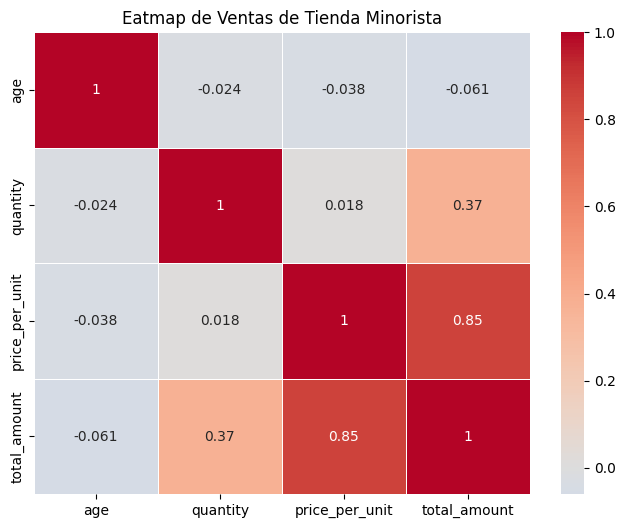

In [13]:
# Se crea la figura
# se asigna a fig para guardar instantaneas del grafico
fig = plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap ='coolwarm', center=0, linewidth=0.5)
plt.title("Eatmap de Ventas de Tienda Minorista")
plt.show()

#### La columna Edad no tiene correlación significativa (eje. 0.038) con las columnas Precio Unitario, Cantidad y Monto Total.
#### La columna Cantidad tiene una correlación positiva de 0.37 con columna Monto Total, se verificara.
#### La columna Precio Unitario tiene alta correlación positiva de 0.85 con la columna Monto Total, se verificara.

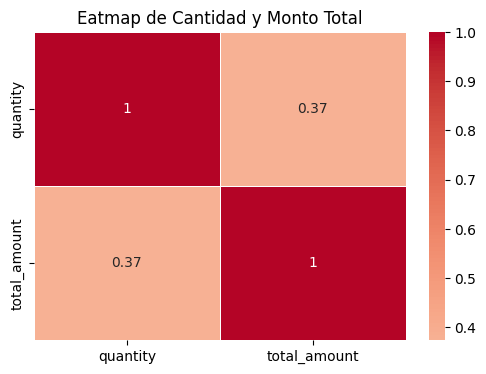

In [14]:
# se crea el gráfico Eatmap para la columna Cantidad y Monto Total.
# se asigna a fig para guardar instantaneas del grafico
fig = plt.figure(figsize=(6, 4))
sns.heatmap(df[["quantity", "total_amount"]].corr(), annot=True, cmap ='coolwarm', center=0, linewidth=0.5)
plt.title("Eatmap de Cantidad y Monto Total")
plt.show()

### La columna Cantidad es directamente proporcional con la columna Monto Total, a mayor Cantidad mayor es el Monto Total, tiene una correlación significativa.

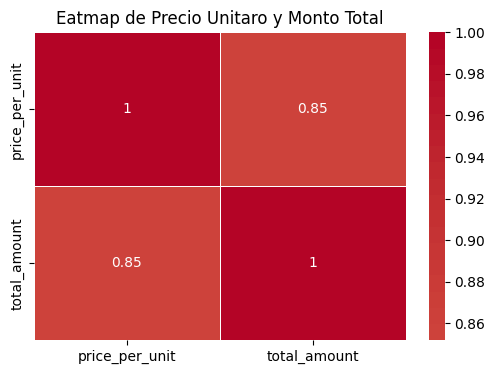

In [15]:
# se crea el gráfico Eatmap para la columna Precio Unitario y Monto Total.
fig = plt.figure(figsize=(6, 4))
sns.heatmap(df[["price_per_unit", "total_amount"]].corr(), annot=True, cmap ='coolwarm', center=0, linewidth=0.5)
plt.title("Eatmap de Precio Unitaro y Monto Total")
plt.show()

In [16]:
# Guardar la figura en formato PNG
fig.savefig('/content/drive/MyDrive/DATA/eatmap_P_M.png')

#### La columna precio Unitario tiene una elevada correlación con la columna Monto Total, directamente proporcional.
#### A mayor valor en el Precio Unitario mayor es el Monto Total

* Crea subplots para comparar diferentes variables clave

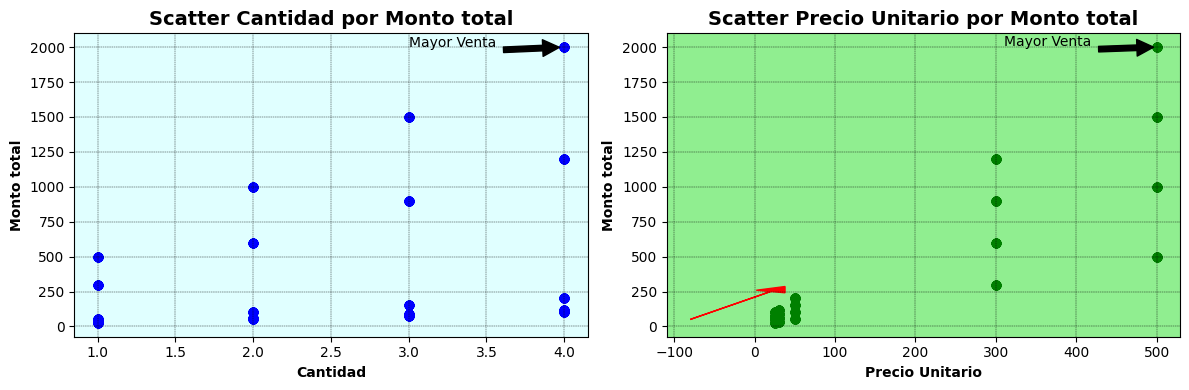

In [17]:
# Se crea Subplot para comparar las columnas Cantidad, Monto total  y Precio Unitario, Monto total.
# Se crea graficos en subplot
fig, axs = plt.subplots(1, 2, figsize=(12, 4))
# Grafico Scatter que muestra correlacion de Cantidad  y Monto Total
axs[0].set_facecolor('lightcyan')
axs[0].scatter(df["quantity"], df["total_amount"], color='blue', alpha=0.5 )
axs[0].set_title("Scatter Cantidad por Monto total", fontsize=14, fontweight='bold')
axs[0].set_xlabel("Cantidad", fontweight='bold')
axs[0].set_ylabel("Monto total", fontweight='bold')
x1_max = df["quantity"].max()
y1_max = df["total_amount"].max()
axs[0].grid(True, which='both', linestyle='--', linewidth=0.3, color='black')
# Añadir anotación
axs[0].annotate('Mayor Venta', xy=(x1_max, y1_max), xytext=(x1_max-1 , y1_max),
            arrowprops=dict(facecolor='black', shrink=0.07))

# Grafico Scatter que muestra correlacion de Precio Unitario y Monto Total
x2_max = df["price_per_unit"].max()
y2_max = df["total_amount"].max()
axs[1].set_facecolor('lightgreen')
axs[1].scatter(df["price_per_unit"], df["total_amount"], color='green', alpha=0.5 )
axs[1].set_title("Scatter Precio Unitario por Monto total", fontsize=14, fontweight='bold')
axs[1].set_xlabel("Precio Unitario", fontweight='bold')
axs[1].set_ylabel("Monto total", fontweight='bold')
axs[1].grid(True, which='both', linestyle='--', linewidth=0.3, color='black')
# Añadir anotación
axs[1].annotate('Mayor Venta', xy=(x2_max+2, y2_max+1), xytext=(x2_max-190 , y2_max+5),
            arrowprops=dict(facecolor='black', shrink=0.07))

# Añadir flecha
axs[1].arrow(x2_max-580, y2_max-1950, 100, 200, head_width=40, head_length=40, fc='red', ec='red')

plt.tight_layout()
plt.show()

#### En el gráfico de Cantidad la mayoria de los puntos se concentran en el rango de 1 a 500 en el Monto total   
#### A medida que aumenta la cantidad el Monto total tiende a aumentar, esto indica una correlación positiva entre las variables.
#### Hay puntos dispersos en el rango de 3.0 a 4.0.
#### La presencia de valores atipicos como 2000 sugieren transacciónes inusuales.

#### En el gráfico de Precio Unitario se ve una gran concentración de puntos en el rango de 0 a 100 en el Precio Unitario.
#### Para Precios Unitarios altos el Monto total es alto cercano a 2000, pero con pocos puntos.
#### En el rango de 300 y 500 se concentra el resto de las trasacciónes.

